In [34]:
from keras import models,layers,optimizers,metrics
from keras.datasets import reuters
import matplotlib.pyplot as plt
import numpy as np
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

In [4]:
len(train_data)

8982

In [11]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decodes_newswire = ' '.join([reverse_word_index.get(i-1,'?') for i in train_data[0]])
decodes_newswire

'? the the a not 3 move in by should 22 in rebates dollar 000 reuters four after about and may in on february said on some reuter after about revs that secretary at and which to but a right would sale 31 said end said been for reuter that earlier for reuter and which mln representation improved noted said domestic said high for reuter that under loss for reuter 000 a sources versus after about last with sale 2 was 12 said co reuter 1 vs'

In [17]:
def vectorize_sequences(sequences,dimansion = 10000):
    results = np.zeros((len(sequences),dimansion))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results
    

In [18]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [25]:
def to_one_hot(labels,dimension=46):
    results = np.zeros((len(labels),dimension))
    for i, label in enumerate(labels):
        results[i,label]=1
    return results


In [26]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [27]:
from keras.utils.np_utils import to_categorical

In [28]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [29]:
model = models.Sequential()

In [30]:
model.add(layers.Dense(128,activation='relu',input_shape = (10000,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='tanh'))
model.add(layers.Dense(64,activation='tanh'))
model.add(layers.Dense(46,activation='softmax'))

In [31]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [33]:
history = model.fit(partial_x_train,partial_y_train,epochs = 20, batch_size=512, validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 164us/step - loss: 2.2351 - acc: 0.5316 - val_loss: 1.4948 - val_acc: 0.6780
Epoch 2/20
7982/7982 [==============================] - 1s 132us/step - loss: 1.2688 - acc: 0.7239 - val_loss: 1.1745 - val_acc: 0.7370
Epoch 3/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.9408 - acc: 0.7943 - val_loss: 1.0967 - val_acc: 0.7510
Epoch 4/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.7256 - acc: 0.8527 - val_loss: 0.9876 - val_acc: 0.7840
Epoch 5/20
7982/7982 [==============================] - 1s 128us/step - loss: 0.5804 - acc: 0.8871 - val_loss: 0.9275 - val_acc: 0.8040
Epoch 6/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.4409 - acc: 0.9171 - val_loss: 0.9970 - val_acc: 0.7660
Epoch 7/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.3645 - acc: 0.9301 - val_loss: 0.9163 - val_acc: 0.7830


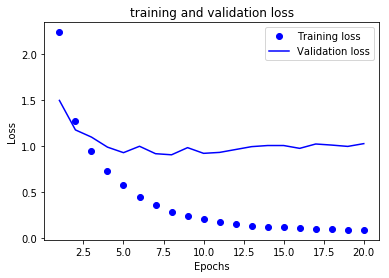

In [36]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label= 'Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


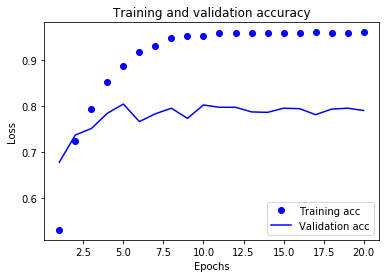

In [37]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
results = model.evaluate(x_test,one_hot_test_labels)
results

2246/2246 [==============================] - 0s 74us/step


[1.183103139975829, 0.7862867320210193]

In [42]:
predictions = model.predict_classes(x_test)
predictions

array([ 3, 10,  1, ...,  3,  3,  1])